# LAB 06 - LinePlot


## 06 집단별 요약 시각화

### #01.준비작업
#### 1-1 패키지 가져오기

In [1]:
from hossam import load_data
#글꼴을 시스템에 등록
from matplotlib import font_manager as fm
#캔버스 생성, 기본 그래픽 함수 제공
from matplotlib import pyplot as plt
#고급 그래픽 기능 제공
import seaborn as sb
import numpy as np


#### 1-2 그래프 초기화

In [2]:
#한글을 지원하는 폰트 파일의 경로
font_path ='./NotoSansKR-Regular.ttf'
#폰트의 그룹을 시스템에 등록
fm.fontManager.addfont(font_path)
#폰트의 속성을 읽어옴
font_prop = fm.FontProperties(fname=font_path)
#읽어온 속성에서 폰트의 이름만 추출
font_name = font_prop.get_name()

#이미지의 선명도를 결정 (1인치 당 픽셀의 수)
my_dpi = 120 
#시스템에 등록된 글꼴 이름  (상단에서 확인한 폰트 이름으로 넣기)
my_font_name = 'Noto Sans KR'
#그림 스타일 지정
my_theme = 'dark'
#seaborn 스타일 (화풍 설정하기)
sb.set_theme(style=my_theme)
#그래프에 한글 폰트 적용
plt.rcParams['font.family']=my_font_name
#기본 폰트 크기
plt.rcParams['font.size'] =16
#그래프에 마이너스 꺠짐 방지 (한글환경에서 필수)
plt.rcParams['axes.unicode_minus']=False

#### 1-3 데이터 가져오기

In [3]:
origin = load_data('penguins')
origin

[data] https://data.hossam.kr/data/kaggle/penguins.xlsx
[desc] 남극 팔머 군도의 펭귄 3종에 대해 신체 치수와 서식지 정보(출처: https://www.kaggle.com/datasets/larsen0966/penguins)

field              description
-----------------  -------------
species            팽귄 종
island             서식지
bill_length_mm     부리 길이
bill_depth_mm      부리 두께
flipper_length_mm  날개 길이
body_mass_g        몸무게
sex                성별



,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,MALE
1,Adelie,Torgersen,39.5,17.4,186,3800,FEMALE
2,Adelie,Torgersen,40.3,18.0,195,3250,FEMALE
3,Adelie,Torgersen,36.7,19.3,193,3450,FEMALE
4,Adelie,Torgersen,39.3,20.6,190,3650,MALE
...,...,...,...,...,...,...,...
329,Gentoo,Biscoe,47.2,13.7,214,4925,FEMALE
330,Gentoo,Biscoe,46.8,14.3,215,4850,FEMALE
331,Gentoo,Biscoe,50.4,15.7,222,5750,MALE
332,Gentoo,Biscoe,45.2,14.8,212,5200,FEMALE


### #02.Barplot
- 집단별 평균 합계 비율 등 요약 통계 시각화의 기본형
- estimator 파라미터로 평균 외에도 median ,sum 등으로 설정 가능
- 범주형 분석에서 가장 표준적으로 쓰이는 그래프

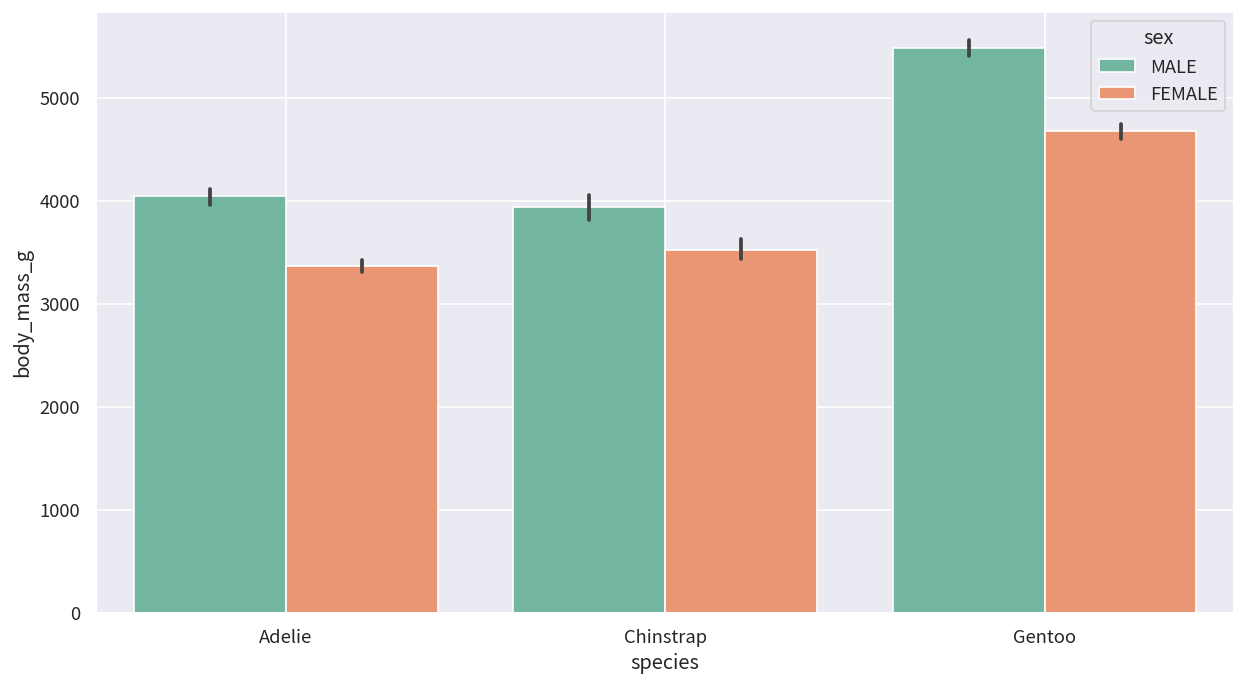

In [4]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280              # 그래프 가로 크기
height_px = 720              # 그래프 세로 크기
rows = 1                     # 그래프 행 수
cols = 1                     # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) barplot 그리기
sb.barplot(
    data=origin,          #사용할 데이터 프레임
    x='species',          #막대의 카테고리축
    y='body_mass_g',      #요약할 수치 변수  
    hue='sex',            #그룹 구분
    estimator = np.mean,
    errorbar=('ci',95),   #ci 는 신뢰수준
    palette ='Set2'
)

# 3) 그래프 꾸미기
ax.grid(True)                          # 배경 격자 표시/숨김

# 4) 출력
plt.tight_layout()                     # 여백 제거
plt.savefig("plot.png", dpi=my_dpi * 2)
plt.show()                             # 그래프 화면 출력
plt.close()                            # 그래프 작업 종료


### #03 CountPlot 빈도 그래프
- 범주형 빈도를 바로 보여주는 가장 단순하고 직관적인 요약 그래프
- 기술통계 보고서 eda 에서 거의 항상 등장

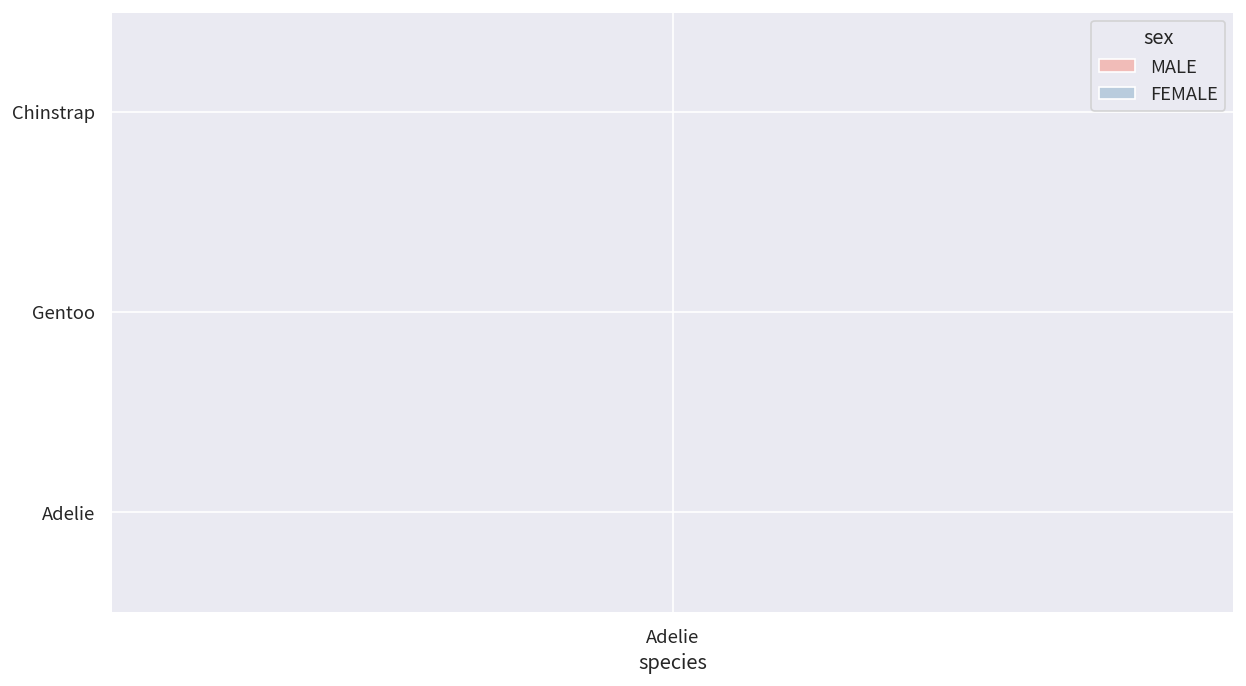

In [5]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280              # 그래프 가로 크기
height_px = 720              # 그래프 세로 크기
rows = 1                     # 그래프 행 수
cols = 1                     # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) count plot 그리기
sb.barplot(
    data=origin,                              #사용할 데이터 프레임
    x='species',                              #막대의 카테고리축
    hue='sex',                                #그룹 구분
    order = ['Chinstrap','Gentoo','Adelie'],   #x 축 범주 순서
    palette ='Pastel1'
)

# 3) 그래프 꾸미기
ax.grid(True)                          # 배경 격자 표시/숨김

# 4) 출력
plt.tight_layout()                     # 여백 제거
plt.savefig("plot.png", dpi=my_dpi * 2)
plt.show()                             # 그래프 화면 출력
plt.close()                            # 그래프 작업 종료


### #04 PointPlot
- 점 + 오차막대 형태의 집단별 평균 + 신뢰구간 요약
- 여러 그룹 hue 비교 시 가장 깔끔하고 해석성이 높음
- 회귀분석 전 EDA 에서 추세 파악용으로 인기

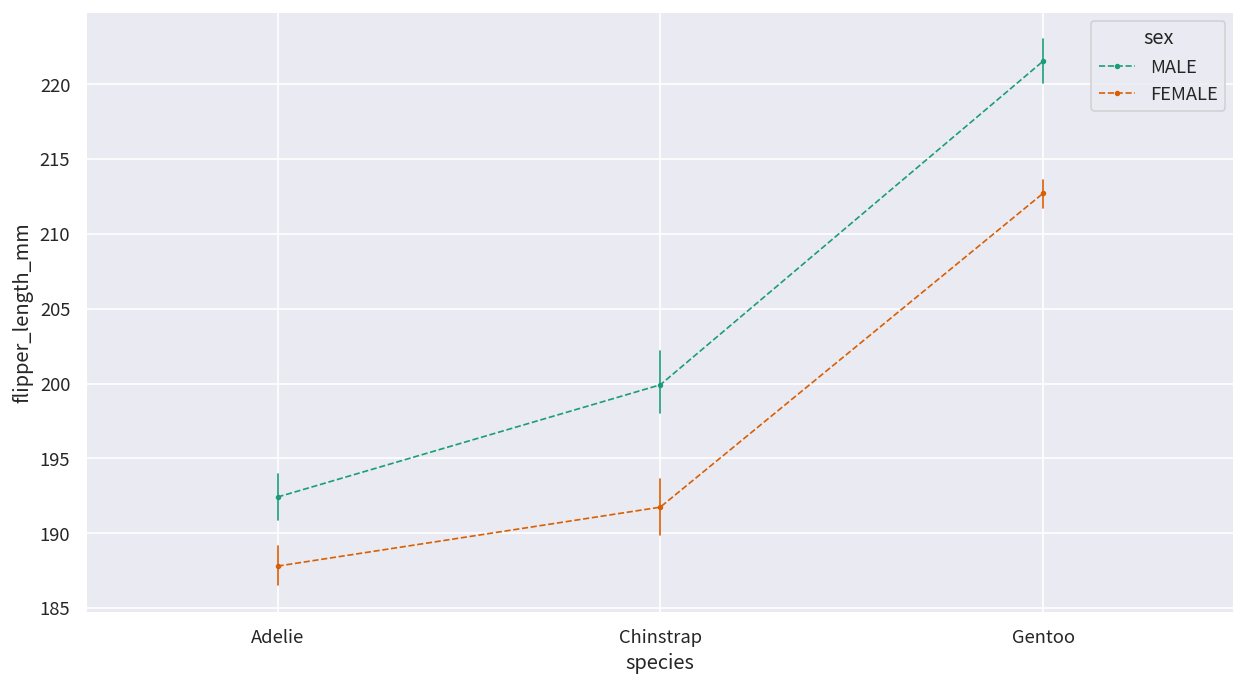

In [6]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280              # 그래프 가로 크기
height_px = 720              # 그래프 세로 크기
rows = 1                     # 그래프 행 수
cols = 1                     # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) Point plot 그리기
sb.pointplot(
    data=origin,                              #사용할 데이터 프레임
    x='species',                              #막대의 카테고리축
    y='flipper_length_mm',
    hue='sex',                                #그룹 구분
    estimator=np.mean,
    errorbar=('ci',95),
    linestyles='--',
    linewidth=1,
    markers='o',
    palette='Dark2'

)

# 3) 그래프 꾸미기
ax.grid(True)                          # 배경 격자 표시/숨김

# 4) 출력
plt.tight_layout()                     # 여백 제거
plt.savefig("plot.png", dpi=my_dpi * 2)
plt.show()                             # 그래프 화면 출력
plt.close()                            # 그래프 작업 종료
